In [31]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

In [2]:
#Read data
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [3]:
#describe the data
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.rename(columns={"Marital.Status":"MaritalStatus","Taxable.Income":"TaxableIncome","City.Population":"CityPopulation","Work.Experience":"WorkExperience"},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    object
 1   MaritalStatus   600 non-null    object
 2   TaxableIncome   600 non-null    int64 
 3   CityPopulation  600 non-null    int64 
 4   WorkExperience  600 non-null    int64 
 5   Urban           600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# Visualization

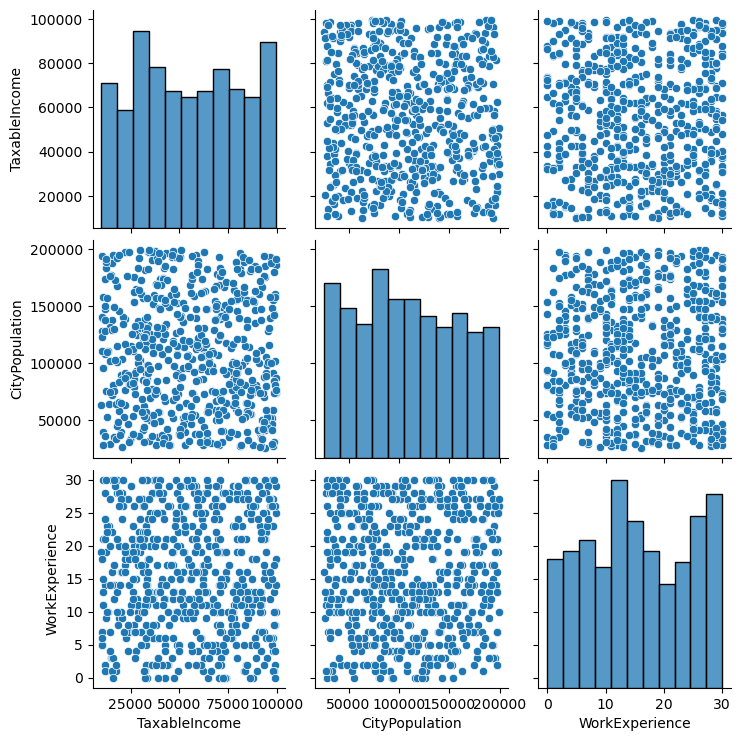

In [7]:
sns.pairplot(df)

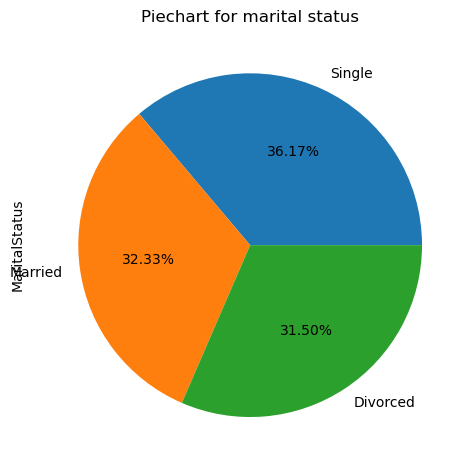

In [8]:
#using Piechart
df['MaritalStatus'].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.title('Piechart for marital status')
plt.tight_layout()

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

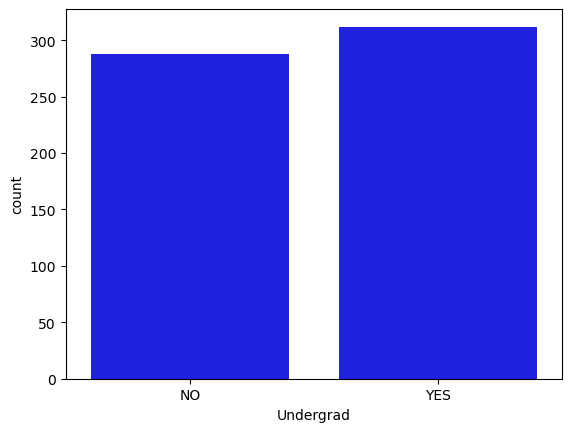

In [11]:
sns.countplot(df['Undergrad'],color='Blue')

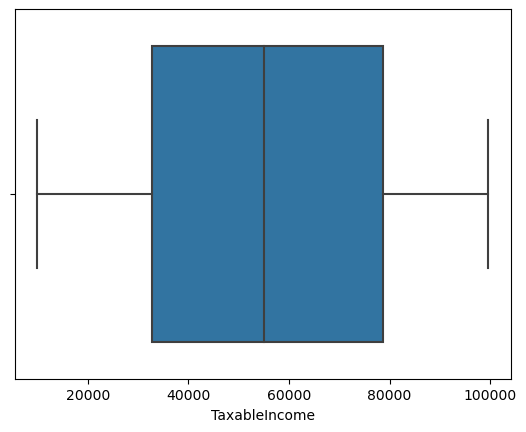

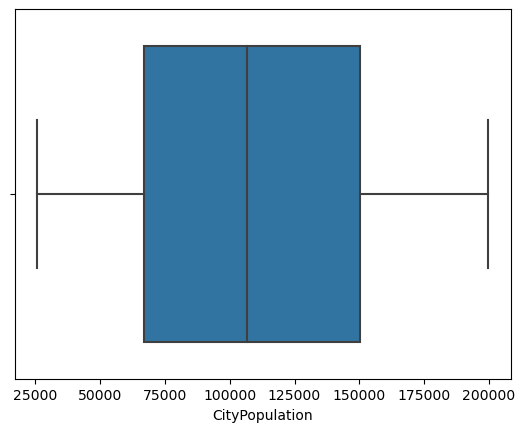

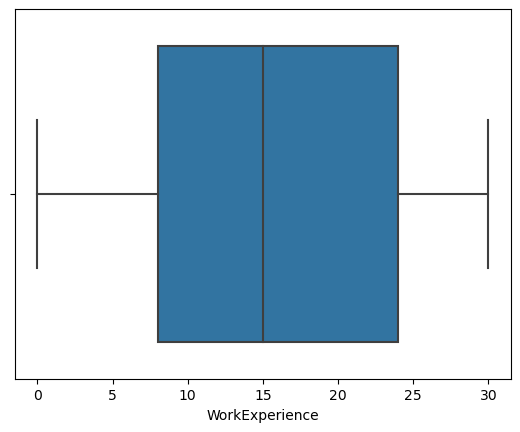

In [12]:
column = ['TaxableIncome','CityPopulation','WorkExperience']
for col in column:
    sns.boxplot(df[col])
    plt.show()

Above boxplot shows there is no outlier present

In [13]:
# Select object columns
object_columns = df.select_dtypes(include=['object']).columns

# Create a dictionary to store the mapping of encoded values to original string values
label_dict = {}

# Apply label encoding to each object column and store the mapping in label_dict
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_dict[col] = dict(zip(le.transform(le.classes_), le.classes_))
    print(label_dict[col])
# Print the mapping of encoded values to original string values for the 'Undergrad' column



{0: 'NO', 1: 'YES'}
{0: 'Divorced', 1: 'Married', 2: 'Single'}
{0: 'NO', 1: 'YES'}


# Adding new column fraudcheck

In [14]:
df["FraudCheck"] = df["TaxableIncome"].apply(lambda x: "Risky" if x <= 30000 else "Good")

# we can also Drop these unnecessary columns so that our depth is decreased and accuracy is also good but here since the acurracy is good no need

x = df.iloc[:,:-1]
y = df['FraudCheck']
le = LabelEncoder()

y = le.fit_transform(y)
y

Undergrad         480
MaritalStatus     480
TaxableIncome     480
CityPopulation    480
WorkExperience    480
Urban             480
dtype: int64

In [15]:
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,FraudCheck
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


The decision tree algorithm don't require any feature scaling. Hence we are not performing scaling for the data

# Model building using default parameters

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

dt = DecisionTreeClassifier(criterion='entropy')
xtrain.count()

Undergrad         480
MaritalStatus     480
TaxableIncome     480
CityPopulation    480
WorkExperience    480
Urban             480
dtype: int64

In [38]:
dt.fit(xtrain,ytrain)

ypred = dt.predict(xtest)

In [42]:
dt.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [39]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        23

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [40]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  1.0


Here both Training and test accuracy is great after using default parameter.

# Plot tree

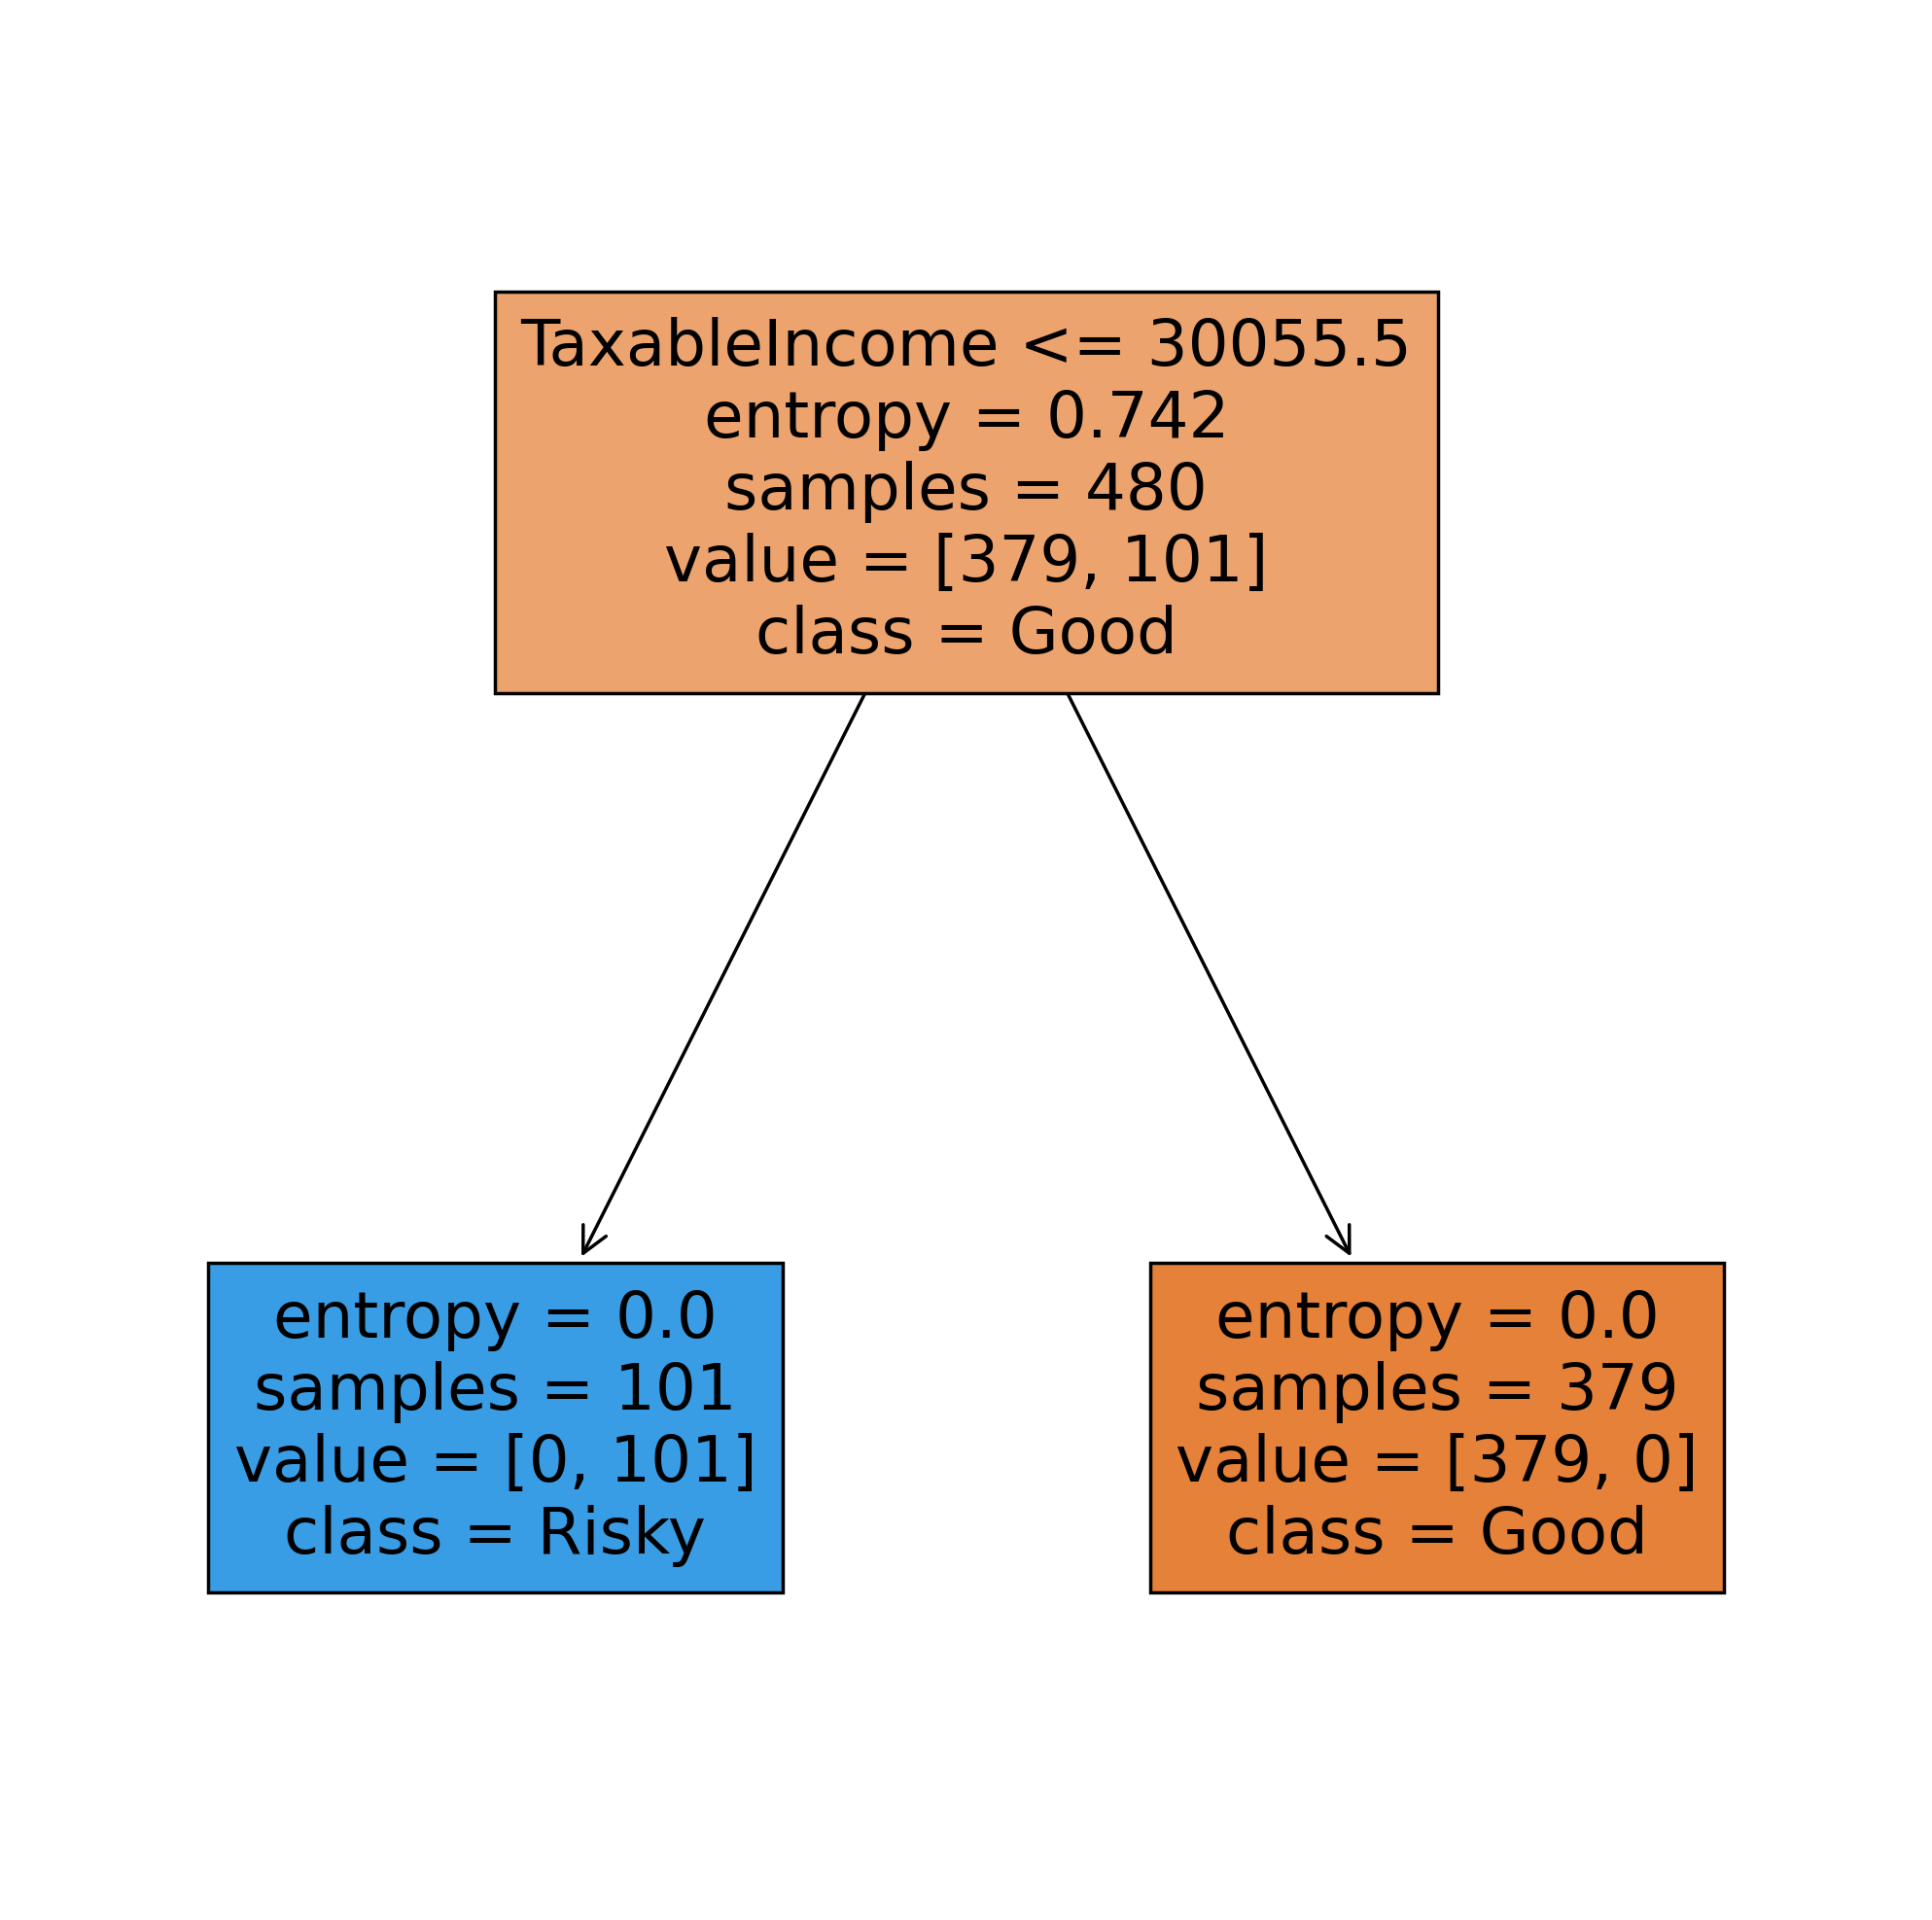

In [10]:
# tree.plot_tree(dt)
# plt.show()
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 250
tree.plot_tree(dt, feature_names=x.columns, 
               class_names=df['FraudCheck'].unique(),
              filled=True)
plt.show()

DECISION TREE CAN BE USED FOR GETTING THE FEATURE IMPORTANCE ALSO SO IT IS HELFUL IN FEATURE SELECTION PROCESS AS WELL

In [11]:
dt.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [12]:
x.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


# Hyperparameter tuning

In [24]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth' : [1,2,3,4,5,6],
    'min_samples_split' : [4,6,8,10,12],
    'max_leaf_nodes' : [8,10,12,14,16,18],
    'min_samples_leaf' : [1,2,3,4,5]
}

In [25]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv = 5, verbose=2)

In [26]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] E

[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_samples_leaf

[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, m

[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=12,

[CV] END criterion=gini, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=12, min_sam

[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_

[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, mi

[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=16, min

[CV] END criterion=gini, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=18, min_sam

[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samp

[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=8, min_sampl

[CV] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_sam

[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12,

[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=12, min_sam

[CV] END criterion=gini, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=14, min_sam

[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_

[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=16, min_sa

[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, mi

[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_

[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=8, min_samples_leaf

[CV] END criterion=gini, max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=10,

[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_sam

[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=12, min_sam

[CV] END criterion=gini, max_depth=3, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=14, m

[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_sam

[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=16, 

[CV] END criterion=gini, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_leaf_nodes=18, min_sam

[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samp

[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=8, min_samples_leaf

[CV] END criterion=gini, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=10, mi

[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_sam

[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, mi

[CV] END criterion=gini, max_depth=4, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=14, min_s

[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_sa

[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=18,

[CV] END criterion=gini, max_depth=4, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=18, min_sam

[CV] END criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=8, min_sampl

[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_sam

[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=10, min_sam

[CV] END criterion=gini, max_depth=5, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=12,

[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_sam

[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=14,

[CV] END criterion=gini, max_depth=5, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=16, min_sam

[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, mi

[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=18, min

[CV] END criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples

[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_sa

[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=10, mi

[CV] END criterion=gini, max_depth=6, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=12, min_sam

[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14,

[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, 

[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=16, min_sam

[CV] END criterion=gini, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_leaf_nodes=18, min_

[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_lea

[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, ma

[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1,

[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_

[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1,

[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=

[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, ma

[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, m

[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=

[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_

[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_lea

[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_lea

[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_d

[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=18, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_

[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_lea

[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_

[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=

[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_d

[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_lea

[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_

[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=

[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_lea

[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_

[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_l

[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss,

[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_lo

[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, ma

[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2

[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_l

[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_los

[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_los

[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss,

[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3

[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, 

[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, 

[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_l

[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, 

[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, 

[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_

[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_de

[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_lo

[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, m

[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_l

[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss

[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_leaf_nodes=18, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, m

[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_

[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, m

[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_l

[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, m

[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=14, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss

[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_lo

[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss

[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6

[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_l

[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, 

[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=14, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss,

[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss,

[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=6, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END criterion=log_l

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 6, 8, 10, 12]},
             verbose=2)

In [27]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

Build the model again using best parameter given by GridSearchCV

In [28]:
#Build the model using best_params_
reg = DecisionTreeClassifier(criterion='gini', max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4)

In [34]:
reg.fit(xtrain,ytrain)
ypred = reg.predict(xtest)

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        23

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [41]:
print('Training accuracy: ', reg.score(xtrain,ytrain))
print('Testing Accuracy: ', reg.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  1.0


Conclusion: After doing hyperparameter tuning we got parameter has criterion='gini', max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4. Both Training and Testing accuracy is 100%. we got regularalized model.